In [1]:
from torchvision import transforms, models 
import torch

import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
from data.camMethods import imageMapping
from data.camMethods import preprocessingImage
from data.camMethods import visualizationCAM
from data.Hook import maxActivisionValue

from data.gradcamMethods import gradCamMethod
from data.gradcamMethods import predictionForList

In [2]:
# PATH_TO_SET = 'dataset/catset'
PATH_TO_SET = 'dataset/mergeDataset'


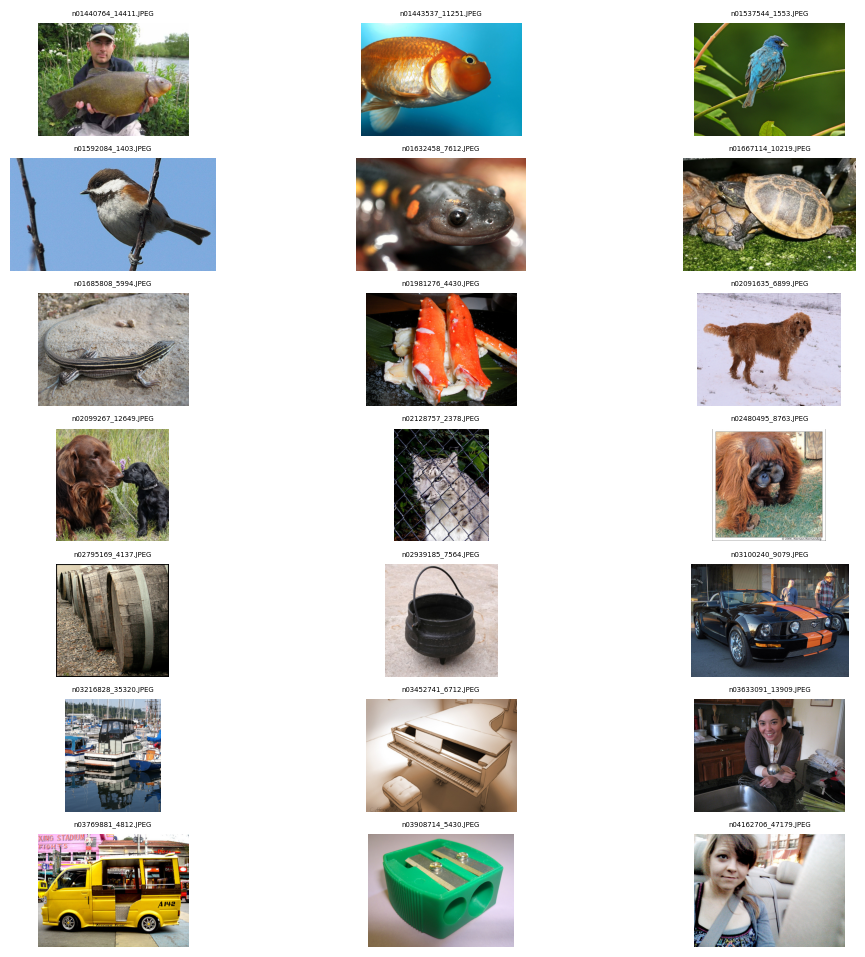

In [3]:
listImage = imageMapping(PATH_TO_SET)  

In [4]:
preprocessingList = preprocessingImage(listImage)
print(len(preprocessingList), '\n', preprocessingList[0].shape)

21 
 torch.Size([1, 3, 224, 224])


In [5]:
model = models.resnet50()
model.load_state_dict(torch.load('model_parameters/resnet50-0676ba61.pth'))
model.eval()
print()

In [6]:
indexNumpy = maxActivisionValue(predictionForList(model, preprocessingList))

In [7]:
#prediction_list -> list after model 1 x 1000
#model -> ResNet 2048 x 7 x 7 
gradCam = gradCamMethod(model, indexNumpy, preprocessingList)

tensor([[[[0.0000e+00, 2.9181e-01, 9.2264e-02,  ..., 2.3819e-02,
           1.9273e-02, 4.7604e-02],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.7172e-01,
           0.0000e+00, 4.1761e-02],
          [0.0000e+00, 1.0599e-02, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [3.0436e-02, 5.2330e-01, 5.5226e-01,  ..., 7.8831e-01,
           5.7526e-01, 4.5276e-01],
          [2.0103e-01, 2.6029e-01, 2.7464e-01,  ..., 9.0810e-01,
           6.5777e-01, 4.6606e-01],
          [3.9923e-02, 1.0370e+00, 8.5733e-01,  ..., 7.2132e-01,
           8.9672e-01, 1.8386e-01]],

         [[0.0000e+00, 4.4349e-01, 1.3163e+00,  ..., 4.4561e-01,
           8.3398e-01, 2.4938e-01],
          [0.0000e+00, 5.4469e-01, 2.1526e+00,  ..., 1.2689e+00,
           1.2357e+00, 1.0162e+00],
          [0.0000e+00, 1.1587e+00, 1.8740e+00,  ..., 1.6826e+00,
           9.7339e-01, 1.3724e+00],
          ...,
          [0.0000e+00, 7.8762e-01, 8.4019e-01,  ..., 1.2733

In [8]:
visualizationCAM(PATH_TO_SET, gradCam)